<a href="https://colab.research.google.com/github/E-D-W-I-N/BigDataAnalysis/blob/Lab-3/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Выполнение работы

In [216]:
!apt-get update
!apt-get install sqlite3

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubun

In [217]:
!sqlite3 -version

3.22.0 2018-01-22 18:45:57 0c55d179733b46d8d0ba4d88e01a25e10677046ee3da1d5b1581e86726f2alt1


In [218]:
!sqlite3 ./InternetSpeed.db ".databases"

main: /content/./InternetSpeed.db


In [219]:
!pip install csvkit

In [220]:
!test -e InternetSpeed.db && rm InternetSpeed.db
!csvsql --db sqlite:///InternetSpeed.db --insert LA_wifi_speed_UK.csv

# Подключение к базе данных и выполенение запросов

In [221]:
import sqlite3
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

In [222]:
query = ('SELECT DateTime FROM LA_wifi_speed_UK ORDER BY DateTime LIMIT 10')
cur.execute(query)

In [223]:
for row in cur:
    print(row)

('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [224]:
query = ('SELECT DateTime FROM LA_wifi_speed_UK ORDER BY random() LIMIT 10')
cur.execute(query)

for row in cur:
    print(row)

('2016-12-02 23:00:00.000000',)
('2016-12-05 07:00:00.000000',)
('2016-12-03 11:00:00.000000',)
('2016-12-08 18:30:00.000000',)
('2016-12-12 22:00:00.000000',)
('2016-12-13 18:30:00.000000',)
('2016-11-28 05:30:00.000000',)
('2016-11-25 10:00:00.000000',)
('2016-12-06 00:30:00.000000',)
('2016-11-29 14:00:00.000000',)


In [225]:
query = ('SELECT * FROM LA_wifi_speed_UK LIMIT 1')
cur.execute(query)

In [226]:
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [227]:
columns = [member[0] for member in cur.description]
columns = columns[1:]

In [228]:
columns = [c.replace('_p', '') for c in columns]
columns = [c.replace('_d', '') for c in columns]
columns = [c.replace('_u', '') for c in columns]

columns = list(set(columns))

In [229]:
columns[:10]

['E07000008',
 'E06000027',
 'E07000081',
 'E06000028',
 'E06000013',
 'E07000191',
 'E07000208',
 'E07000083',
 'E07000066',
 'E07000195']

In [230]:
area = columns[0]
print(area)

E07000008


In [231]:
suffix = {'_p': 'ping', '_d': 'download', '_u': 'upload'}
print(suffix.keys())
print(suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E07000008')

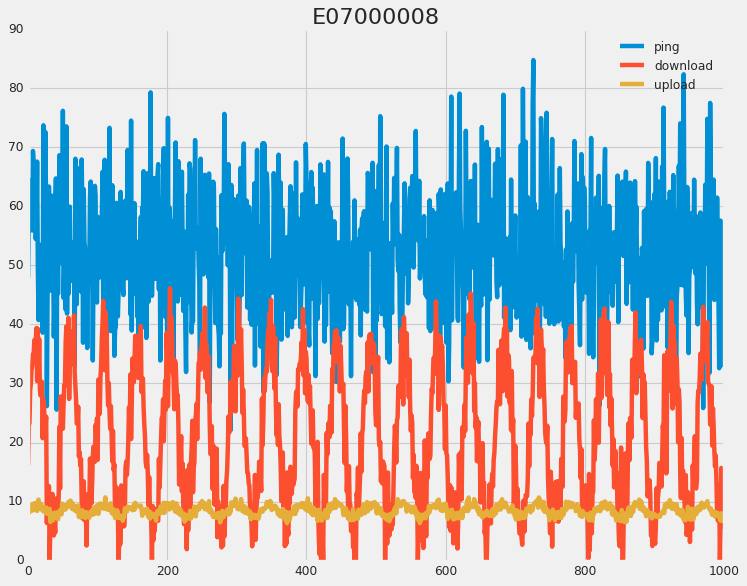

In [232]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
area = columns[0]
plt.figure(figsize=(10, 8))

for s in suffix.keys():
    query = ('SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime').format(area, s)
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s])
plt.legend()
plt.title(area)

# Обработка данных с помощью Pandas

In [233]:
import pandas as pd
new_columns = ['Area', 'Average_p', 'Average_d', 'Average_u']
df = pd.DataFrame(columns = new_columns)

In [234]:
for i in range(len(columns)-1):
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        query = ('SELECT avg("{}{}") FROM LA_wifi_speed_UK').format(columns[i], s)
        cur.execute(query)
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
df.head()

,Area,Average_p,Average_d,Average_u
0,E07000008,52.434442,21.317241,8.476413
1,E06000027,52.631233,21.229613,8.504995
2,E07000081,52.492373,21.377423,8.487923
3,E06000028,53.423799,21.727761,8.677846
4,E06000013,52.559734,21.762508,8.612477


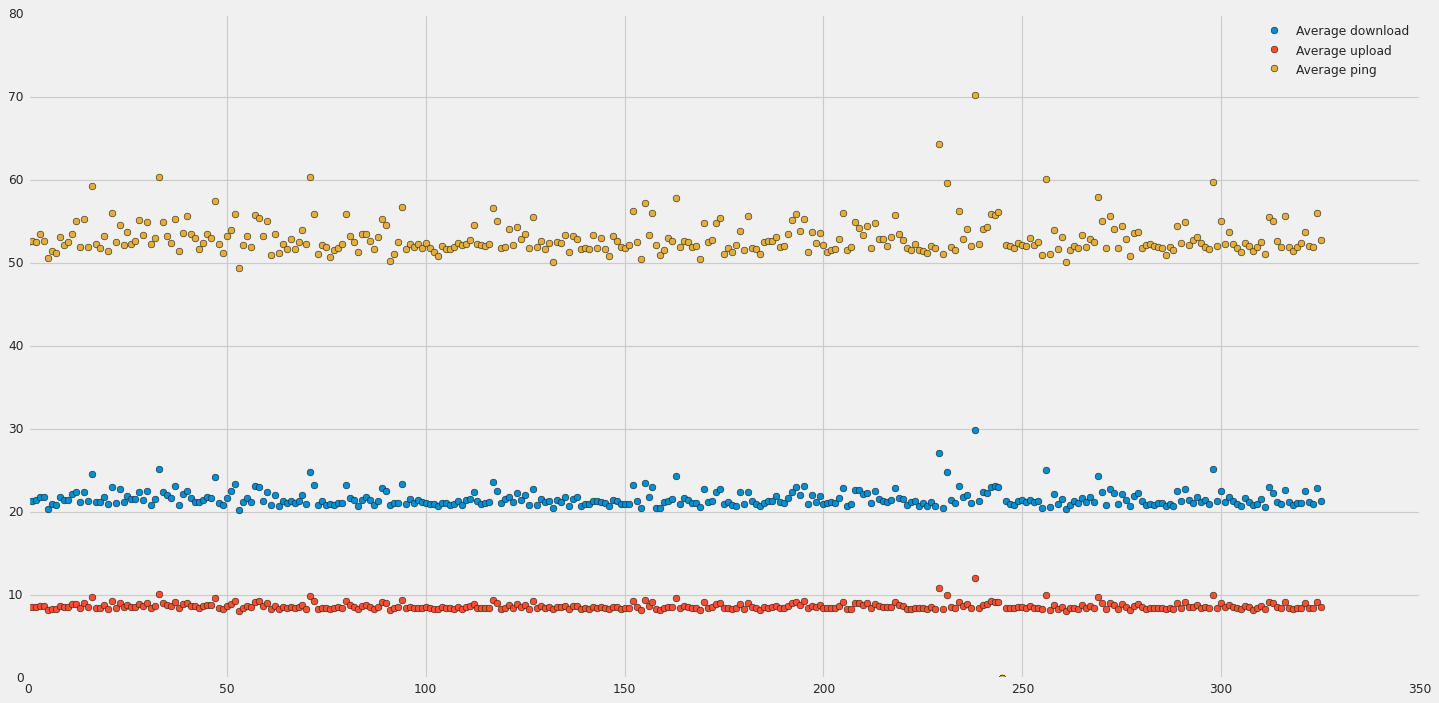

In [235]:
plt.figure(figsize=(20, 10))
plt.plot(df.index, df[['Average_d', 'Average_u', 'Average_p']], 'o')
plt.legend(['Average download', 'Average upload', 'Average ping'])

In [236]:
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass

df.to_sql('average_speed', conn)

In [237]:
query_2 = 'SELECT * from average_speed'
cur.execute(query_2)

print(cur.fetchone())
print(cur.fetchone())

(0, 'E07000008', 52.434441612840175, 21.317241011471317, 8.476412907722873)
(1, 'E06000027', 52.63123333641262, 21.22961332178506, 8.504995496567139)


In [238]:
conn.close()

In [239]:
!csvsql --db sqlite:///InternetSpeed.db --insert LA_population.csv

In [240]:
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

In [241]:
query = ('SELECT * from LA_population LIMIT 10')
cur.execute(query)
for row in cur:
    print(row)

('Aberdeen City', 'S12000033', 222793.0)
('Aberdeenshire', 'S12000034', 252973.0)
('Adur', 'E07000223', 61182.0)
('Allerdale', 'E07000026', 96422.0)
('Amber Valley', 'E07000032', 122309.0)
('Angus', 'S12000041', 115978.0)
('Antrim and Newtownabbey', 'N09000001', 138567.0)
('Ards and North Down', 'N09000011', 156672.0)
('Argyll and Bute', 'S12000035', 88166.0)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693.0)


In [242]:
query = ('SELECT * FROM average_speed JOIN LA_population ON LA_population."LA_code"=average_speed.Area')
cur.execute(query)
k = 0
for row in cur:
    if k > 10:
        break
    print(row)
    k += 1

(0, 'E07000008', 52.434441612840175, 21.317241011471317, 8.476412907722873, 'Cambridge', 'E07000008', 123867.0)
(1, 'E06000027', 52.63123333641262, 21.22961332178506, 8.504995496567139, 'Torbay', 'E06000027', 130959.0)
(2, 'E07000081', 52.49237323893318, 21.37742327865603, 8.487922785229806, 'Gloucester', 'E07000081', 121688.0)
(3, 'E06000028', 53.4237989913677, 21.727760934928504, 8.677846112567071, 'Bournemouth', 'E06000028', 183491.0)
(4, 'E06000013', 52.559733633619715, 21.76250809646988, 8.612477370740764, 'North Lincolnshire', 'E06000013', 167446.0)
(5, 'E07000191', 50.49232738404278, 20.28030319855073, 8.154217069047325, 'West Somerset', 'E07000191', 34675.0)
(6, 'E07000208', 51.35208683405866, 20.927548710851312, 8.27938025331297, 'Epsom and Ewell', 'E07000208', 75102.0)
(7, 'E07000083', 51.194877919537575, 20.780128744718265, 8.289832595674502, 'Tewkesbury', 'E07000083', 81943.0)
(8, 'E07000066', 53.022440659206794, 21.812392422914037, 8.639531743272892, 'Basildon', 'E07000066

In [243]:
import seaborn as sns
df = pd.read_sql(query, con=conn)
minValue = df['Total_Population'].max()
print(minValue)

1073045.0


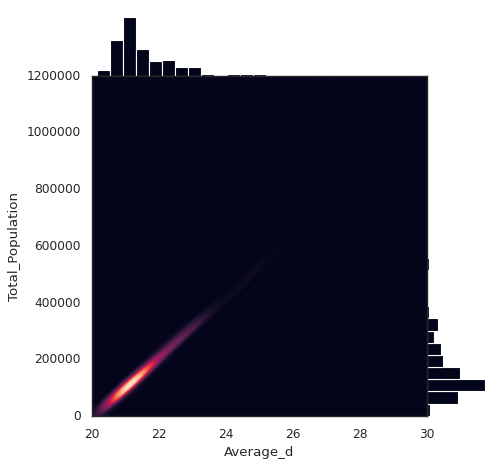

In [244]:
sns.set_theme(style="white")
g = sns.JointGrid(data=df, x="Average_d", y="Total_Population", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((20, 30), (0, 1199000)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)